[ここ](https://qiita.com/Suguru_Toyohara/items/820b0dad955ecd91c7f3)のコードがいまいちわからないので解析する

<BatchDataset shapes: <unknown>, types: tf.int32>


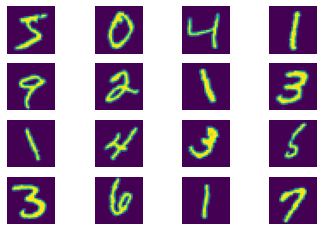

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

def rotate(image):
    return ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)

@tf.function
def rotate_tf(image):
    rotated = tf.py_function(rotate,[image],[tf.int32])
    return rotated[0]


(train_x, train_y), (test_x, test_y) =  keras.datasets.mnist.load_data()
train_x = train_x.reshape(-1,28,28,1)
train_ds = tf.data.Dataset.from_tensor_slices(train_x)
batched_train_ds = train_ds.map(rotate_tf).batch(16) #ここが肝心のMap

print(batched_train_ds)

# pick images in first batch
first_batch = next(iter(batched_train_ds))
sample_images = first_batch.numpy().reshape((-1,28,28))

plt.figure(facecolor="white")
for i, sample_image in enumerate(sample_images):
  plt.subplot(4,4,i+1)
  plt.imshow(sample_image)
  plt.axis("off")
plt.show()